In [1]:
# LIBRERÍAS NECESARIAS:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default') 

# Lectura del dataframe:
ruta='C:/Users/Mati/Downloads/events.csv'
##df=pd.read_csv(ruta)

In [2]:
#Leyendo el DataSet

df = pd.read_csv('C:/Users/Mati/Downloads/events.csv')
df.head()  #23 columnas 
print(df.shape) #filas 1.011.288
df.columns

####################################################################################
# TRANSFORMACIONES Y CREACION DE VARIABLES NECESARIAS:

# Con esto creo un campo fecha:
df['fecha'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d').dt.date
df['fecha'] = df['fecha'].astype('datetime64[ns]')

# Columna número de mes
df['month']= pd.DatetimeIndex(df['timestamp']).month 
# Columna número de dia
df['day']= pd.DatetimeIndex(df['timestamp']).day 

# Columna con el nombre del mes
df.loc[df.month==1,'nombre_mes']='ENERO'
df.loc[df.month==2,'nombre_mes']='FEBRERO'
df.loc[df.month==3,'nombre_mes']='MARZO'
df.loc[df.month==4,'nombre_mes']='ABRIL'
df.loc[df.month==5,'nombre_mes']='MAYO'
df.loc[df.month==6,'nombre_mes']='JUNIO'

# Agrego dia de la semana y si es finde o no:
df['fecha2'] = df['fecha'].dt.dayofweek+1  # Sumo 1 para que no empiece en 0.

df.loc[df.fecha2==1,'dia'] ='LUNES'
df.loc[df.fecha2==2,'dia'] ='MARTES'
df.loc[df.fecha2==3,'dia'] ='MIERCOLES'
df.loc[df.fecha2==4,'dia'] ='JUEVES'
df.loc[df.fecha2==5,'dia'] ='VIERNES'
df.loc[df.fecha2==6,'dia'] ='SABADO'
df.loc[df.fecha2==7,'dia'] ='DOMINGO'

# Definimos si es durante la semana o el finde:
df.loc[df.fecha2<=5,'week'] ='WEEK'
df.loc[df.fecha2>5,'week'] ='WEEKEND'

# Armamos una columna con la MARCA del celu visto:
df.loc[(df['model'].str.lower().str.contains('iphone', na=False)==True),'brand_viewed']='IPHONE'
df.loc[(df['model'].str.lower().str.contains('samsung', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='SAMSUNG'
df.loc[(df['model'].str.lower().str.contains('motorola', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='MOTOROLA'
df.loc[(df['model'].str.lower().str.contains('sony', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='SONY'
df.loc[(df['model'].str.lower().str.contains('lg', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='LG'
df.loc[(df['model'].str.lower().str.contains('asus', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='ASUS'
df.loc[(df['model'].str.lower().str.contains('ipad', na=False)==True)&(pd.isna(df.brand_viewed)),'brand_viewed']='IPAD'
df.loc[(df.event=='viewed product')&(pd.isna(df.brand_viewed)),'brand_viewed']='OTROS'


# Usuarios que convirtieron:
convirtieron=df[df.event=='conversion'].person.unique()

# Flag por tipo de evento:
df.loc[df.event=='visited site','visit']=1
df.loc[df.event=='viewed product','viewprod']=1
df.loc[df.event=='checkout','checkout']=1
df.loc[df.event=='conversion','conversion']=1

# Operaciones agrupadas por día: 
df_fecha=df.groupby( by=['fecha','month','week','nombre_mes'] )['visit','viewprod','checkout','conversion'].sum().reset_index()
df_fecha=df_fecha.sort_values(by=['fecha']).reset_index()
df_fecha['kpi_conversion']=(df_fecha.conversion/df_fecha.visit)*100

# Operaciones agrupadas por mes:
df_ops_agg=df.groupby( by=['month','nombre_mes'] )['visit','viewprod','checkout','conversion'].sum().reset_index()
df_ops_agg=df_ops_agg.sort_values(by=['month']).reset_index()
df_ops_agg['kpi_conversion']=(df_ops_agg.conversion/df_ops_agg.visit)*100


####################################################################################



df.sample(5)


(1011288, 23)


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,day,nombre_mes,fecha2,dia,week,brand_viewed,visit,viewprod,checkout,conversion
451117,2018-05-30 21:54:41,brand listing,74725078,NaN,NaN,NaN,NaN,NaN,NaN,"6553,5424,10506,3131,7575,9146,3169,15775,1141...",...,30,MAYO,3,MIERCOLES,WEEK,NaN,nan,nan,nan,nan
493381,2018-06-13 20:25:23,viewed product,7e209a0f,NaN,"9,315.00",Samsung Galaxy J5 Prime,Muito Bom,32GB,Dourado,NaN,...,13,JUNIO,3,MIERCOLES,WEEK,SAMSUNG,nan,1.00,nan,nan
651258,2018-06-11 03:36:47,searched products,a77e1b4f,NaN,NaN,NaN,NaN,NaN,NaN,"12520,12506",...,11,JUNIO,1,LUNES,WEEK,NaN,nan,nan,nan,nan
750738,2018-06-07 03:53:41,viewed product,c133de45,NaN,"2,829.00",iPhone 6,Bom,16GB,Prateado,NaN,...,7,JUNIO,4,JUEVES,WEEK,IPHONE,nan,1.00,nan,nan
487415,2018-06-13 18:37:44,viewed product,7c9113eb,NaN,"9,511.00",Sony Xperia Z3 Dual,Muito Bom,16GB,Branco,NaN,...,13,JUNIO,3,MIERCOLES,WEEK,SONY,nan,1.00,nan,nan


In [ ]:
######## SLIDE 3 ########

Text(0,0.5,'Número de registros')

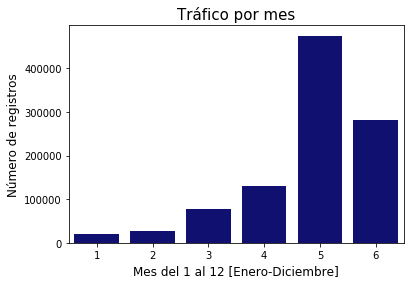

In [3]:
#####TRAFICO DEL SITIO POR MES

df['month'].value_counts() # el mes de junio tuvimos mas actividad 
df_month_counts= df['month'].value_counts()
g = sns.barplot(x=df_month_counts.index , y=df_month_counts.values, orient='v', color= "navy") #palette= "Blues" 
g.set_title("Tráfico por mes", fontsize=15)
g.set_xlabel("Mes del 1 al 12 [Enero-Diciembre]", fontsize=12)
g.set_ylabel("Número de registros", fontsize=12)




Text(0,0.5,'Número de registros')

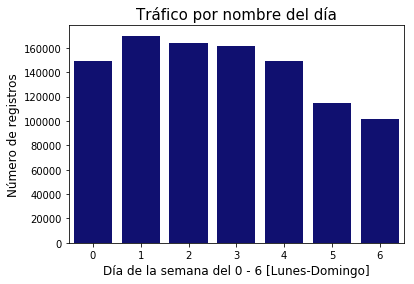

In [4]:
# tenemos el listado del 2018-01-01 07:32:26 al 2018-06-15 23:59:31 - cinco meses y medio aprox
df.timestamp.describe() 

df['year']= pd.DatetimeIndex(df['timestamp']).year   #creando columna año
df['month']= pd.DatetimeIndex(df['timestamp']).month  #creando columna mes
df['day']= pd.DatetimeIndex(df['timestamp']).day     #creando columna day
df['hour']= pd.DatetimeIndex(df['timestamp']).hour   # creando columna hour
df['dayofweek']= pd.DatetimeIndex(df['timestamp']).dayofweek  #creado columna datofweek

#####TRAFICO POR DIA DE LA SEMANA
df['dayofweek'].value_counts() #los dias de mayor actividad fueron los martes, miercoles, jueves
df_dayofweek_counts= df['dayofweek'].value_counts()
g = sns.barplot(x=df_dayofweek_counts.index , y=df_dayofweek_counts.values, orient='v', color= "navy" )
g.set_title("Tráfico por nombre del día", fontsize=15)
g.set_xlabel("Día de la semana del 0 - 6 [Lunes-Domingo]", fontsize=12)
g.set_ylabel("Número de registros", fontsize=12)

In [ ]:
######## SLIDE 4 ########

Text(0,0.5,'Conversiones')

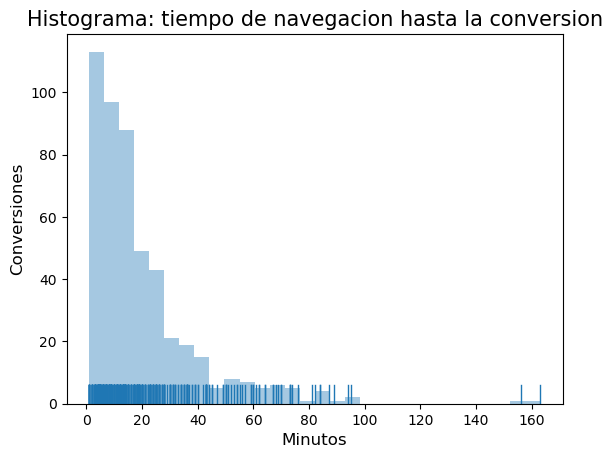

In [14]:
# Analisis para ver cuanto tiempo toma la conversion

# Armamops un dataset solo con los eventos de conversión:
conv2=df.loc[df.event=='conversion',['person','fecha','timestamp','brand_viewed']]

# Creamos el dataset de los que convirtieron pero de sus eventos de llegada al sitio (visited site):
vs=df.loc[(df.person.isin(convirtieron)) & (df.event=='visited site'),['person','dia','nombre_mes','new_vs_returning','channel','device_type','country','region','city','timestamp','fecha','week']]

# Joineamos los datasets.
result = pd.merge(vs,conv2,on=['person','fecha']).reset_index()

# Pasamos a formato fecha:
result['timestamp_x'] = pd.to_datetime(result['timestamp_x'])
result['timestamp_y'] = pd.to_datetime(result['timestamp_y'])

# Resto las fechas:
result['tiempo_conv']=result.timestamp_y-result.timestamp_x

# Tiempo conversión en minutos:
result['tiempo_conv_mins'] = result['tiempo_conv'].dt.total_seconds().div(60).astype(int)

# Tomamos el dataset pero la mínima fecha. O sea la visita más próxima.
result_min=result.loc[result[result.tiempo_conv_mins>0].groupby("person")["tiempo_conv_mins"].idxmin()]

# Promedio de tiempo para conversión, por marca del celular: (esto lo usamos más adelante)
df_brands_c=result_min.groupby( by=['brand_viewed'] )['tiempo_conv_mins'].mean().reset_index()

# Gráfico:
g = sns.distplot(result_min[result_min.tiempo_conv_mins<180].tiempo_conv_mins,kde=False,rug=True,bins=30)
g.set_title("Histograma: tiempo de navegacion hasta la conversion", fontsize=15)
g.set_xlabel("Minutos", fontsize=12)
g.set_ylabel("Conversiones", fontsize=12)

In [ ]:
######## SLIDE 5 ########

Text(0,0.5,'Tipo de evento')

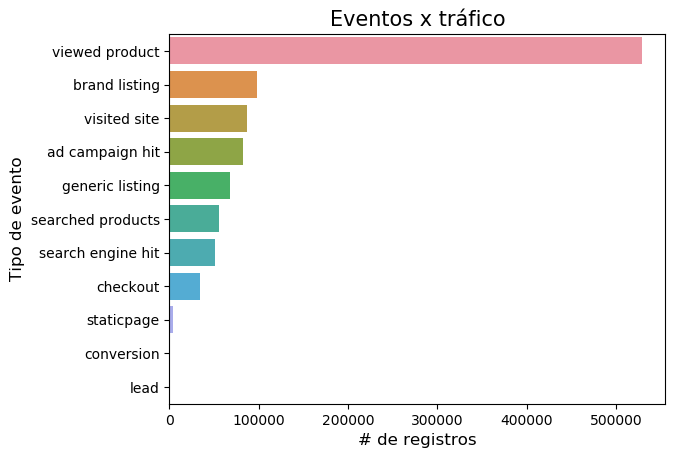

In [37]:
pd.value_counts(df['event']).count() #tal como se dijo arriba 11 eventos generan 1011288 de registros

cant_event= df['event'].value_counts()  #cantidad de eventos
porc_event= df['event'].value_counts(1) #porcentaje de eventos

cant_event= cant_event.reset_index()
resume_event= pd.DataFrame(cant_event.values, porc_event.values).reset_index()
resume_event

resume_event= resume_event.rename(index=str, columns={"index": "porc_event", 0 : "evento", 1 : "cantidad"})
resume_event = resume_event[['evento', 'cantidad','porc_event']]
resume_event

event_counts= df['event'].value_counts(0) #si le pongo 1 es el porcentaje
g = sns.barplot(x=event_counts.values , y=event_counts.index, orient='h')
g.set_title("Eventos x tráfico", fontsize=15)
g.set_xlabel("# de registros", fontsize=12)
g.set_ylabel("Tipo de evento", fontsize=12)

In [ ]:
######## SLIDE 6 ########

Text(0,0.5,'% Conversion')

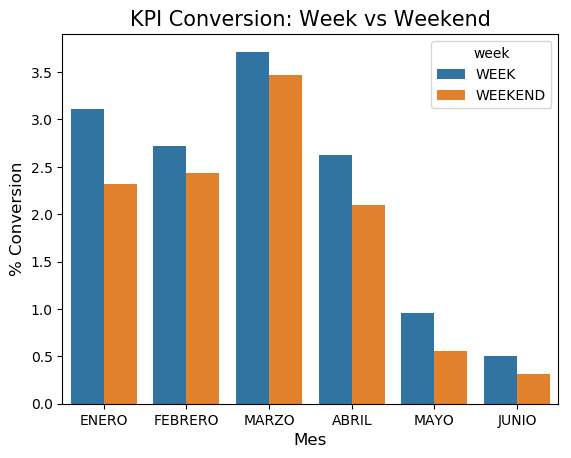

In [13]:
# GRAFICO PARA DIAPOSITIVA Nº 6

df_week=df_fecha.groupby( by=['month','week','nombre_mes'] )['visit','viewprod','checkout','conversion'].sum().reset_index()
df_week=df_week.sort_values(by=['month']).reset_index()
df_week['kpi_conversion']=(df_week.conversion/df_week.visit)*100


g = sns.barplot(x="nombre_mes", y="kpi_conversion", data=df_week,hue='week')
g.set_title("KPI Conversion: Week vs Weekend", fontsize=15)
g.set_xlabel("Mes", fontsize=12)
g.set_ylabel("% Conversion", fontsize=12)

In [ ]:
######## SLIDE 7 ########

Text(0,0.5,'Conversiones')

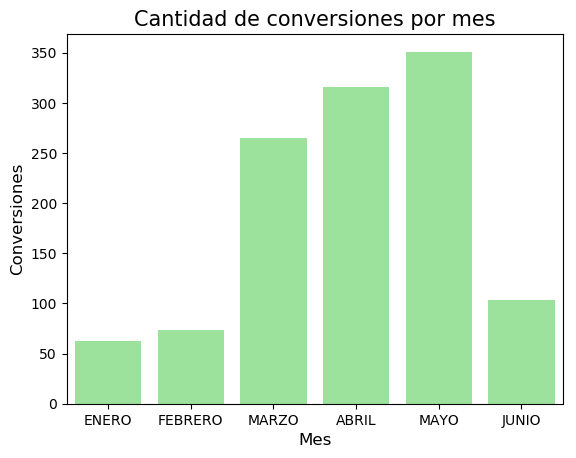

In [12]:
# GRAFICO PARA DIAPOSITIVA Nº 7

g = sns.barplot(x="nombre_mes", y="conversion",data=df_ops_agg,color='lightgreen')
g.set_title("Cantidad de conversiones por mes", fontsize=15)
g.set_xlabel("Mes", fontsize=12)
g.set_ylabel("Conversiones", fontsize=12)

In [9]:
######## SLIDE 8 ########


Text(0,0.5,'Número de conversiones')

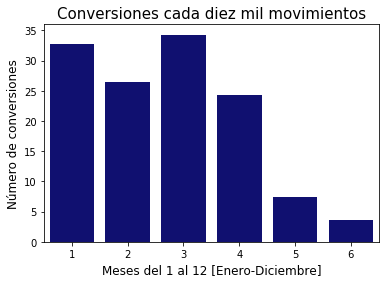

In [13]:
#################################################################################
#####SELECCIONAR UN EVENTO PARA ANALIZAR EL TIMESTAMP ###########################
#creando un set filtrado para analizar especìficamente dentro de una variable####
columna= 'event'
tipo= 'conversion'

df_seleccionar_evento = df[df[columna] == tipo] # hay 1172 conversiones

###### TASA DE EFECTIVIDAD POR MES - DE CADA DIEZ MIL MOVIMIENTOS CUANTAS CONVERSIONES###############
df_diezmil= df_seleccionar_evento['month'].value_counts()*10000/ df['month'].value_counts() # de cada diez mil movimiento hay,
g = sns.barplot(x=df_diezmil.index , y=df_diezmil.values, orient='v' , color= "navy")
g.set_title("Conversiones cada diez mil movimientos", fontsize=15)
g.set_xlabel("Meses del 1 al 12 [Enero-Diciembre]", fontsize=12)
g.set_ylabel("Número de conversiones", fontsize=12)

In [ ]:
######## SLIDE 9 ########

In [16]:
#############################################################################################
#############################################################################################
###########################Cual es la campaña más efectiva- Análisis por campaña ############

ids_unicos_conversion= df_seleccionar_evento['person'].value_counts()
ids_unicos_conversion= ids_unicos_conversion.reset_index()
ids_unicos_conversion= ids_unicos_conversion.rename(index=str, columns={"index": "person", 'person' : "cantidad"})
ids_unicos_conversion['personas_convirtieron'] = ids_unicos_conversion['person']

df_campañas_conversiones = pd.merge(df_personxcampaña, ids_unicos_conversion,how='left', on='person')
c = df_campañas_conversiones.groupby(['campaign_source']).agg({'person':pd.Series.nunique,'personas_convirtieron':pd.Series.nunique,'ad campaign hit': 'sum'})
c= c.sort_values(['personas_convirtieron'],ascending=False)
c= c[:10]


In [ ]:
######## SLIDE 10 ########

Text(0,0.5,'Keyword')

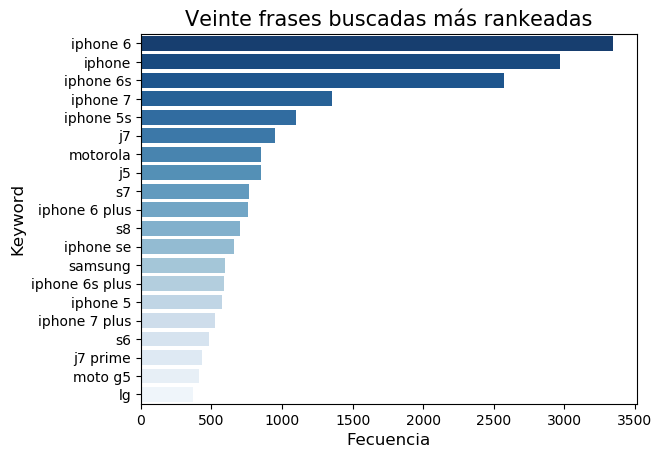

In [17]:
# ¿Cómo buscan los clientes ?- Veinte frases más buscadas
d= df['search_term'].str.lower().value_counts()
d= d[:20]

g = sns.barplot(x=d.values , y=d.index, orient='h',  palette= "Blues_r")
g.set_title("Veinte frases buscadas más rankeadas", fontsize=15)
g.set_xlabel("Fecuencia", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)

In [ ]:
######## SLIDE 11 ########

Text(0,0.5,'Keyword')

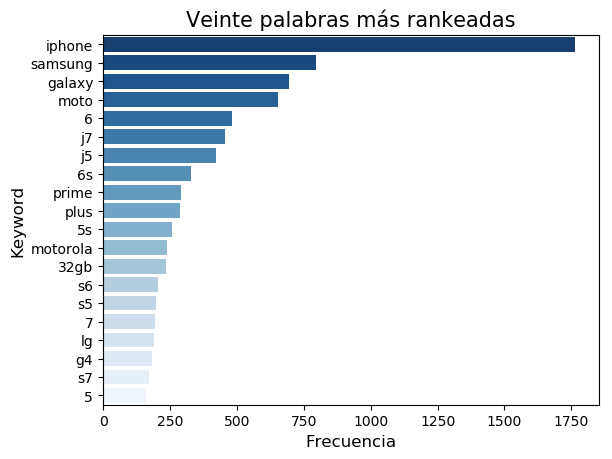

In [18]:
#¿Cómo buscan los clientes que compran? - Veinte palabras más buscadas #######
#DATA SET DE COMPRA

df_personxconversion=df[df.person.isin(convirtieron)]
df_personxconversion['search_term'].value_counts()
t= df_personxconversion['search_term'].str.lower()
t1=t.str.cat(sep=' ')
listaPalabras = t1.split(' ')
listaPalabras = pd.DataFrame(listaPalabras)
listaPalabras[0].value_counts(0)
d= listaPalabras[0].value_counts(0)
d= d[:20]

g2 = sns.barplot(x=d.values , y=d.index, orient='h',  palette= "Blues_r")
g2.set_title("Veinte palabras más rankeadas", fontsize=15)
g2.set_xlabel("Frecuencia", fontsize=12)
g2.set_ylabel("Keyword", fontsize=12)

In [ ]:
######## SLIDE 12 ########

In [ ]:
########para poder correr estos graficos se debe tener instalado  previamente El paquete wordcloud###########

from wordcloud import WordCloud

t= df['search_term'].str.lower()
t=t.str.cat(sep=' ')
wordcloud = WordCloud(max_words=500,collocations=False).generate(t)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud de los terminos más buscados")
plt.show()


t2= df['search_term'].str.lower()
t2=t2.str.split(' ').str.get(1)
t2=t2.str.cat(sep=',')
wordcloud2 = WordCloud(max_words=100,collocations=False).generate(t2)
plt.imshow(wordcloud2)
plt.title("Wordcloud tomando la 2da palabra de cada frase buscada")
plt.axis("off")
plt.show()


In [ ]:
######## SLIDE 13 ########

Text(0,0.5,'Modelos')

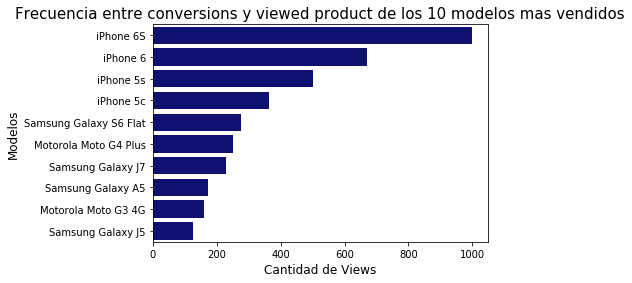

In [17]:
#lista de viewed product por modelo
#lista de conversiones por modelo
column_viewed_product=df[df["event"] == "viewed product"]["model"].value_counts() 
column_conversion=df[df["event"] == "conversion"]["model"].value_counts() 

#uno ambas listas en un solo df desechando las que tuvieron viewed product pero no tuvieron conversiones
df_slide3=pd.concat([column_viewed_product, column_conversion], axis=1, join='inner') 

#le doy nombre a mis columnas
df_slide3.columns=['viewed product','conversion'] 

#calculamos la frecuencia de conversiones por viewed product
df_slide3['Freq']=df_slide3['conversion']/df_slide3['viewed product'] 

#calculamos la frecuencia  de  viewed product por conversiones
df_slide3['Freq2']=round(1/df_slide3['Freq'] ,0) 

#Ordenamos por mas conversiones y nos quedamos con las 10 primeras
df_slide31 = df_slide3.sort_values(ascending=False,by="conversion").head(10)

#de las 10 primeras, ordenamos por Frecuencia
df_slide3_Final = df_slide31.sort_values(ascending=False,by="Freq2")


#######GRAFICO SLIDE 15#########

#Hacemos un reset del Indice para ordenar los datos
grafico_S3=df_slide3_Final.reset_index()

#Codificamos el Grafico de Barras 
grafico_barplot_3 = sns.barplot(x=grafico_S3.Freq2 , y=grafico_S3.iloc[:,0] , orient='h', color='navy')
grafico_barplot_3.set_title("Frecuencia entre conversions y viewed product de los 10 modelos mas vendidos", fontsize=15 , color='black')
grafico_barplot_3.set_xlabel("Cantidad de Views", fontsize=12)
grafico_barplot_3.set_ylabel("Modelos", fontsize=12)




In [ ]:
######## SLIDE 14 ########

Text(0,0.5,'Modelos')

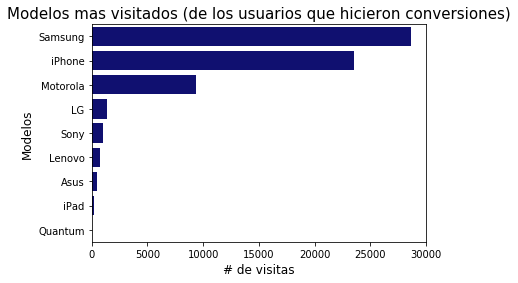

In [20]:
#### Nos quedamos solo con los registros de id- que hicieron conversiones ####
df_seleccionar_evento['person'].nunique() #716 personas unicas que hicieron conversion
df_seleccionar_evento.groupby(['person']).agg({'person':pd.Series.nunique})

ids_unicos= df_seleccionar_evento['person'].value_counts()
df_personxconversion = df[df['person'].isin(ids_unicos.index)]
df_personxconversion = df_personxconversion.reset_index()
df_personxconversion['conversion'] = (df_personxconversion['event']=='conversion')
df_personxconversion['checkout'] = (df_personxconversion['event']=='checkout')
df_personxconversion['ad_campaign_hit'] = (df_personxconversion['event']=='ad campaign hit')
df_personxconversion['lead'] = (df_personxconversion['event']=='lead')

# Realizamos una seleccion de la primer palabra en los model, para quedarnos unicamente con la marca y no con el modelo
a = df['model']
marca =a.str.split(' ').str.get(0)
df['short_model']= marca

#tomamos la lista de las views de las marcas de nuestro nuevo data set acotado
df_personxconversion['short_model'].value_counts()



grafico_slide_10 = df_personxconversion['short_model'].value_counts(0)
g = sns.barplot(x=grafico_slide_10.values , y=grafico_slide_10.index, orient='h', color='navy')
g.set_title("Modelos mas visitados (de los usuarios que hicieron conversiones)", fontsize=15)
g.set_xlabel("# de visitas", fontsize=12)
g.set_ylabel("Modelos", fontsize=12)

In [ ]:
######## SLIDE 15 ########

Samsung                    0.44
iPhone                     0.36
Motorola                   0.14
LG                         0.02
Sony                       0.02
Lenovo                     0.01
Asus                       0.01
iPad                       0.00
Quantum                    0.00
Name: short_model, dtype: float64

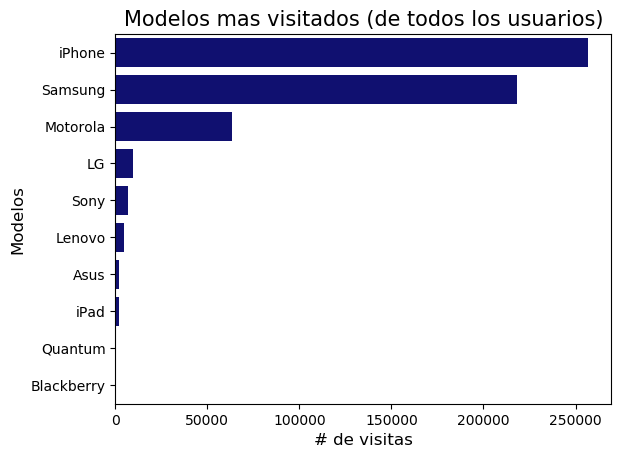

In [35]:
# ya teniamos nuestro split para obtener la marca
a = df['model']
marca =a.str.split(' ').str.get(0)
df['short_model']= marca

#por lo tanto tomamos un contador de nuestra nueva columna del Data Set y obtenemos una lista de los productos mas vistos
df['short_model'].value_counts(0)


#Grafico Slide 11#

grafico_slide_11 = df['short_model'].value_counts(0)
g = sns.barplot(x=grafico_slide_11.values , y=grafico_slide_11.index, color='navy', orient='h')
g.set_title("Modelos mas visitados (de todos los usuarios)", fontsize=15)
g.set_xlabel("# de visitas", fontsize=12)
g.set_ylabel("Modelos", fontsize=12)



#para obtener los porcentajes tanto de la Slide 10 como la del 11 hacemos
df['short_model'].value_counts(1)
df_personxconversion['short_model'].value_counts(1)

In [ ]:
######## SLIDE 16 ########

,brand_viewed,viewprod,conversion,kpi_conversion,tiempo_conv_mins
0,IPHONE,"242,014.00",323.00,0.13,17.75
1,LG,"9,098.00",20.00,0.22,27.71
2,MOTOROLA,"59,547.00",149.00,0.25,26.88
3,SAMSUNG,"202,648.00",641.00,0.32,28.08
4,SONY,"6,782.00",23.00,0.34,10.60


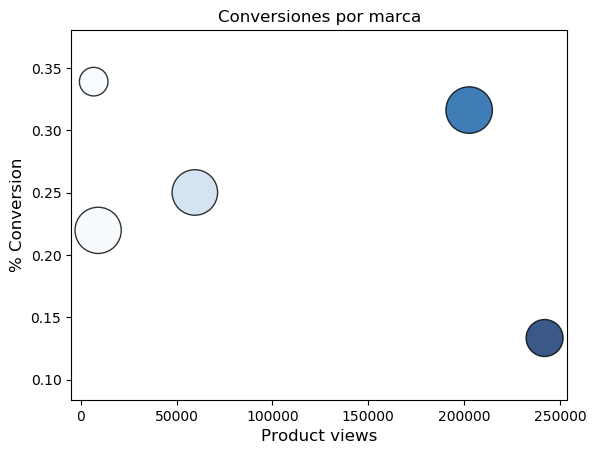

In [16]:

# Productos vistos y conversiones:
df_brands_b=df.groupby( by=['brand_viewed'] )['viewprod','conversion'].sum().reset_index()
df_brands_b['kpi_conversion']=(df_brands_b.conversion/df_brands_b.viewprod)*100


# Joineo y pierdo los casos que no tuvieron venta
results_2= pd.merge(df_brands_b,df_brands_c,on=['brand_viewed']).reset_index()

 
# Creación de las variables por separado para cada dimensión del gráfico:
x = results_2.viewprod
y = results_2.kpi_conversion
z = results_2.tiempo_conv_mins

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*40, c=x, alpha=0.8,cmap="Blues",edgecolors="black", linewidth=1)

plt.xlabel("Product views",fontsize=12)
plt.ylabel("% Conversion",fontsize=12)
plt.title("Conversiones por marca",fontsize=12)

# Tabla asociada al gráfico anterior:
results_2[['brand_viewed','viewprod','conversion','kpi_conversion','tiempo_conv_mins']]

In [ ]:
######## SLIDE 17 ########

Text(0,0.5,'Porcentaje de conversiones')

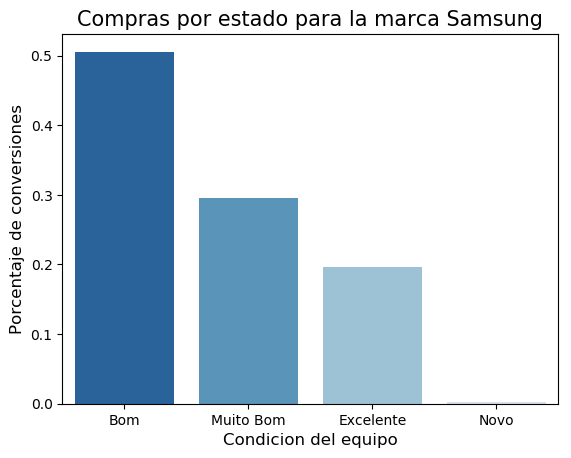

In [20]:
#Estado de productos que compraron los clientes: Samsung

a= df['model']
a1=a.str.split(' ').str.get(0)
df['short_model']= a1

#creando un set conversion####
columna= 'event'
tipo= 'conversion'
df_seleccionar_evento = df[df[columna] == tipo]


df_Samsung= df_seleccionar_evento[df_seleccionar_evento['short_model']== 'Samsung']
df_Samsung= df_Samsung['condition'].value_counts(1)
g1 = sns.barplot(x=df_Samsung.index , y=df_Samsung.values, orient='v',   palette= "Blues_r")
g1.set_title("Compras por estado para la marca Samsung", fontsize=15)
g1.set_xlabel("Condicion del equipo", fontsize=12)
g1.set_ylabel("Porcentaje de conversiones", fontsize=12)





Text(0,0.5,'Porcentaje de de conversiones')

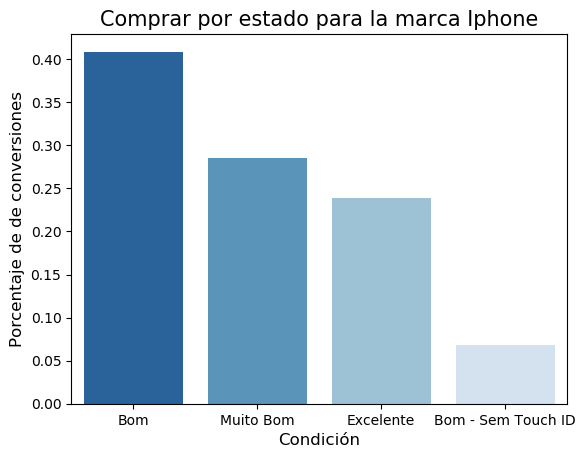

In [21]:
#Estado de productos que compraron los clientes: Iphone

a= df['model']
a1=a.str.split(' ').str.get(0)
df['short_model']= a1

#creando un set conversion####
columna= 'event'
tipo= 'conversion'
df_seleccionar_evento = df[df[columna] == tipo]

df_Iphone= df_seleccionar_evento[df_seleccionar_evento['short_model']== 'iPhone']
df_Iphone= df_Iphone['condition'].value_counts(1)
g2 = sns.barplot(x=df_Iphone.index , y=df_Iphone.values, orient='v', palette= "Blues_r")
g2.set_title("Comprar por estado para la marca Iphone", fontsize=15)
g2.set_xlabel("Condición", fontsize=12)
g2.set_ylabel("Porcentaje de de conversiones", fontsize=12)

In [ ]:
######## SLIDE 18 ########

In [ ]:
##### ¿las personas que compraron, que color compran? ####################################
######la persona que compro tiene un evento para ese color ###############################

color= df_seleccionar_evento.groupby(['short_color2']).agg({'person':pd.Series.nunique,})
color= color.sort_values(['person'],ascending=False)
color= color[:10]
color= color.reset_index()

g4 = sns.barplot(x=color.short_color2 , y=color.person, orient='v',  color="lightgreen")
g4.set_title("Personas que compraron por color elegido", fontsize=15)
g4.set_xlabel("color", fontsize=12)
g4.set_ylabel("Número de personas", fontsize=12)

In [ ]:
######## SLIDE 19 ########

In [ ]:
##### ¿las personas que compraron, que color compran? ####################################
######comparacion entre Iphone vs Samsung ###############################

df_Iphone2= df_seleccionar_evento[df_seleccionar_evento['short_model']== 'iPhone']
df_Iphone2= df_Iphone2['short_color2'].value_counts(1)

g5 = sns.barplot(y=df_Iphone2.index , x=df_Iphone2.values, orient='h',  color="lightgreen")
g5.set_title("Personas que compraron Iphone por color", fontsize=15)
g5.set_xlabel("Porcentaje de personas", fontsize=12)
g5.set_ylabel("Color", fontsize=12)



df_Samsung2= df_seleccionar_evento[df_seleccionar_evento['short_model']== 'Samsung']
df_Samsung2= df_Samsung2['short_color2'].value_counts(1)

g6 = sns.barplot(y=df_Samsung2.index , x=df_Samsung2.values, orient='h',  color="lightgreen")
g6.set_title("Personas que compraron Samsung con evento por color", fontsize=15)
g6.set_xlabel("Porcentaje de personas", fontsize=12)
g6.set_ylabel("Color", fontsize=12)


In [ ]:
######## SLIDE 20 ########

Text(0,0.5,'Número de personas')

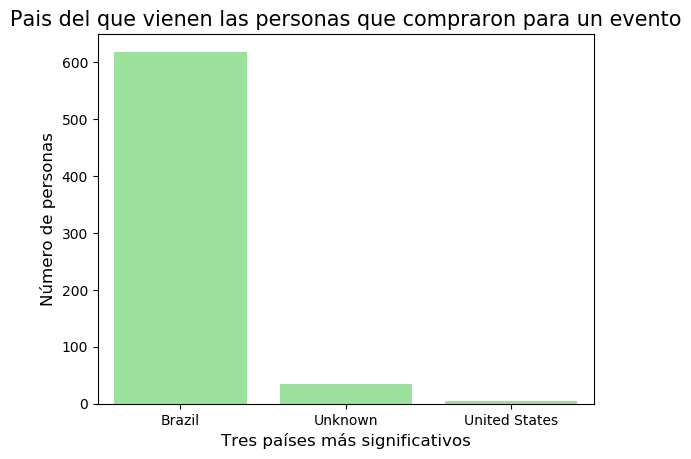

In [22]:
##### ¿Ciudad y País de las personas que compran? - Pais ####################################
country= df_personxconversion.groupby(['country']).agg({'person':pd.Series.nunique,})
country= country.sort_values(['person'],ascending=False)
country= country[:3]
country= country.reset_index()

g7 = sns.barplot(x=country.country , y=country.person, orient='v',  color="lightgreen")
g7.set_title("Pais del que vienen las personas que compraron para un evento", fontsize=15)
g7.set_xlabel("Tres países más significativos", fontsize=12)
g7.set_ylabel("Número de personas", fontsize=12)

Text(0,0.5,'Veinte ciudades más significativos')

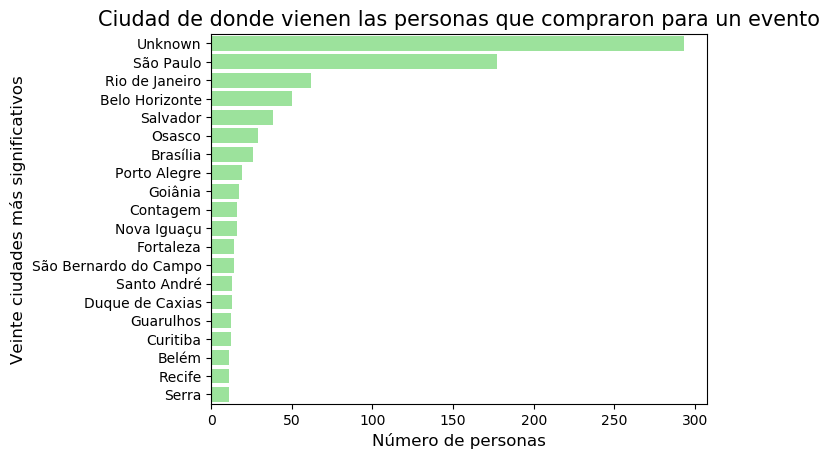

In [23]:
##### ¿Ciudad y País de las personas que compran? - Ciudad ##################################
city= df_personxconversion.groupby(['city']).agg({'person':pd.Series.nunique,})
city= city.sort_values(['person'],ascending=False)
city= city[:20]
city= city.reset_index()

g8 = sns.barplot(y=city.city , x=city.person, orient='h',  color="lightgreen")
g8.set_title("Ciudad de donde vienen las personas que compraron para un evento", fontsize=15)
g8.set_xlabel("Número de personas", fontsize=12)
g8.set_ylabel("Veinte ciudades más significativos", fontsize=12)

In [ ]:
######## SLIDE 21 ########

Text(0,0.5,'Screen R')

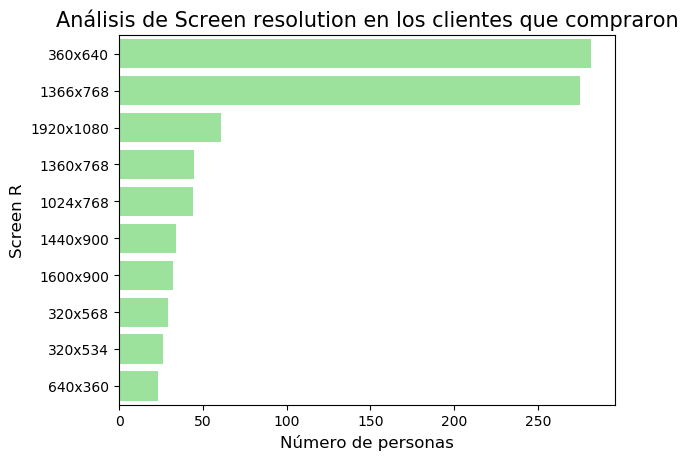

In [24]:
##### screen_resolution  ####################################
sr= df_personxconversion.groupby(['screen_resolution']).agg({'person':pd.Series.nunique,})
sr= sr.sort_values(['person'],ascending=False)
sr= sr[:10]
sr= sr.reset_index()

g9 = sns.barplot(y=sr.screen_resolution , x=sr.person, orient='h',  color="lightgreen")
g9.set_title("Análisis de Screen resolution en los clientes que compraron", fontsize=15)
g9.set_xlabel("Número de personas", fontsize=12)
g9.set_ylabel("Screen R", fontsize=12)

In [ ]:
######## SLIDE 23 ########

In [9]:
##################################################################################
#### Análisis por campaña - mensual- ######################################
columna= 'event'
tipo= 'ad campaign hit'
df_seleccionar_campaign = df[df[columna] == tipo]

df_seleccionar_campaign['person'].nunique()  #hay 21312 personas unicas que recibieron campañas
ids_unicos= df_seleccionar_campaign['person'].value_counts()
df_personxcampaña = df[df['person'].isin(ids_unicos.index)]
df_personxcampaña = df_personxcampaña.reset_index()
p = df_personxcampaña.groupby(['month']).agg({'person': pd.Series.nunique,'checkout': 'sum','conversion': 'sum','ad campaign hit': 'sum'})
p = p.reset_index()
p['Kpi_efectividad_porc'] = p['conversion']*100/ p['ad campaign hit']
p

g = sns.barplot(x=p.month , y=p.Kpi_efectividad_porc, orient='v', color= "navy")
g.set_title("Tasa de efectividad de campañas por mes", fontsize=15)
g.set_xlabel("Mes 1-6 [Enero-Junio]", fontsize=12)
g.set_ylabel("Kpi_efectividad_porc", fontsize=12)

In [ ]:
######## SLIDE 24 ########

In [19]:
##################################################################################
#### Análisis por campaña - #############################################
###primer grafico
ids_unicos_conversion= df_seleccionar_evento['person'].value_counts()
ids_unicos_conversion= ids_unicos_conversion.reset_index()
ids_unicos_conversion= ids_unicos_conversion.rename(index=str, columns={"index": "person", 'person' : "cantidad"})
ids_unicos_conversion['personas_convirtieron'] = ids_unicos_conversion['person']

df_campañas_conversiones = pd.merge(df_personxcampaña, ids_unicos_conversion,how='left', on='person')
c = df_campañas_conversiones.groupby(['campaign_source']).agg({'person':pd.Series.nunique,'personas_convirtieron':pd.Series.nunique,'ad campaign hit': 'sum'})
c= c.reset_index()
c['kpi_efectividad_porc'] = c['personas_convirtieron']*100/c['ad campaign hit']
c= c.sort_values(['kpi_efectividad_porc'],ascending=False)
c=c[:10]

g = sns.barplot(y=c.campaign_source , x=c.kpi_efectividad_porc, orient='h', palette= "Blues_r")
g.set_title("Efectividad por Campaña", fontsize=15)
g.set_xlabel("Kpi_efectividad_porc", fontsize=12)
g.set_ylabel("Nombre de campaña", fontsize=12)

###segundo grafico
c= c.sort_values(['personas_convirtieron'],ascending=False)
c= c[:10]
g = sns.barplot(y=c.campaign_source , x=c.personas_convirtieron, orient='h', palette= "Blues_r")
g.set_title("Personas que hicieron conversión por campaña", fontsize=15)
g.set_xlabel("Numero de personas", fontsize=12)
g.set_ylabel("Nombre de campaña", fontsize=12)